In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
# Define the URL
url = "https://hahana.soest.hawaii.edu/FTP/hot/water/ac2.sea"

# Send a GET request to the URL
response = requests.get(url)

In [3]:
response

<Response [200]>

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

# Assuming the data is in a table, find the table element
table = soup.find('table')

In [8]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "data/ts1.csv"  # Update this with the actual path to your CSV file

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


      crn     date  stime  etime  itype  depth      chl    phaeo       l12  \
0       #   yymmdd   hhmm   hhmm             m    mg/m3    mg/m3   mg C/m3   
1       1   881031     -9     -9      0     24    0.129    0.077    12.210   
2       1   881031     -9     -9      0     42    0.192    0.051     2.470   
3       1   881031     -9     -9      0     68    0.285    0.303     2.580   
4       1   881031     -9     -9      0    114    0.326    0.044     0.720   
...   ...      ...    ...    ...    ...    ...      ...      ...       ...   
2585  339   220901    443   1948      2     75    0.180    0.227    -9.000   
2586  339   220901    443   1948      2    100    0.208    0.578    -9.000   
2587  339   220901    443   1948      2    125    0.130    0.418    -9.000   
2588  339   220901    443   1948      2    150    0.076    0.310    -9.000   
2589  339   220901    443   1948      2    175    0.038    0.128    -9.000   

           d12      bsal     pbact     hbact     sbact     ebac

In [13]:
df.head

<bound method NDFrame.head of       crn     date  stime  etime  itype  depth      chl    phaeo       l12  \
0       #   yymmdd   hhmm   hhmm             m    mg/m3    mg/m3   mg C/m3   
1       1   881031     -9     -9      0     24    0.129    0.077    12.210   
2       1   881031     -9     -9      0     42    0.192    0.051     2.470   
3       1   881031     -9     -9      0     68    0.285    0.303     2.580   
4       1   881031     -9     -9      0    114    0.326    0.044     0.720   
...   ...      ...    ...    ...    ...    ...      ...      ...       ...   
2585  339   220901    443   1948      2     75    0.180    0.227    -9.000   
2586  339   220901    443   1948      2    100    0.208    0.578    -9.000   
2587  339   220901    443   1948      2    125    0.130    0.418    -9.000   
2588  339   220901    443   1948      2    150    0.076    0.310    -9.000   
2589  339   220901    443   1948      2    175    0.038    0.128    -9.000   

           d12      bsal     pbac

In [20]:
column_names = df.columns
print(column_names)

Index(['crn', ' date', ' stime', ' etime', ' itype', ' depth', ' chl',
       ' phaeo', ' l12', ' d12', ' bsal', ' pbact', ' hbact', ' sbact',
       ' ebact', ' '],
      dtype='object')


In [21]:
df[' chl']

0         mg/m3
1         0.129
2         0.192
3         0.285
4         0.326
         ...   
2585      0.180
2586      0.208
2587      0.130
2588      0.076
2589      0.038
Name:  chl, Length: 2590, dtype: object

In [40]:
import matplotlib.pyplot as plt
import arviz as az

# Assuming df is your DataFrame with 'chl' and 'data' columns

# Convert 'data' column to datetime format
df[' date'] = pd.to_datetime(df[' date'][1:], format=' %y%m%d')


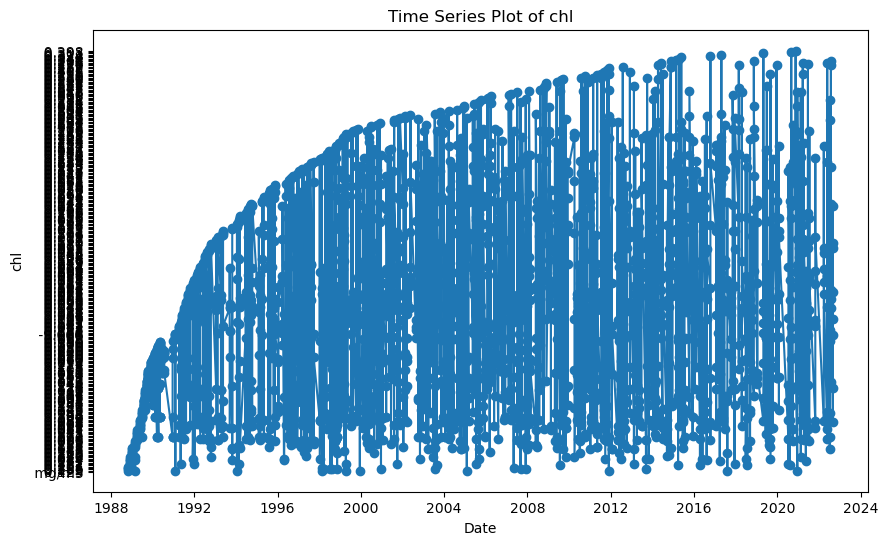

In [46]:
## Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df[' date'], df[' chl'], marker='o', linestyle=None)
plt.title('Time Series Plot of chl')
plt.xlabel('Date')
plt.ylabel('chl')
#plt.grid(True)
plt.show()